# Stopping criteria for SOSP parsers

The problem: if we want to model self-paced reading, we need a way of determining when the next word should be read in. The previous models are based on RSVP, so the ISI is fixed external to the parser.

Technically, this amounts to specifying a discontinuity boundary for the piecewise-smooth dynamical system that is the parser. A second technical note: specifying the discontinuity boundary might make the system amenable to first-passage time analyses...

Approaches to consider:
* Link strength threshold
* Velocity or kinetic energy threshold
* Biomass/biodiversity threshold (Wildenberg...; only for systems w/ >= 2 links)
* Spivey's dynamic threshold link strength (McRae et al., 1998): 1 - alpha t
* Soparse: Link and time threshold

## A test system

To test this, I'll start with the simplest possible system: a single link connecting two treelets. This just boils the system down to a case of logistic growth, but it will let me at least start testing.

<function matplotlib.pyplot.show>

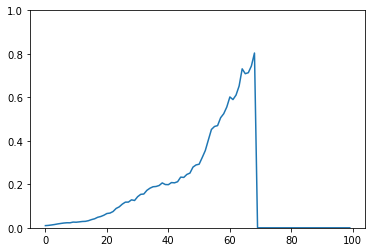

In [34]:
# Defining dynamics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def link_threshold(x, threshold, tol):
    if x < threshold:
        return True
    else:
        return False

def vel_threshold(x, threshold, tol):
    vel = np.sqrt(x**2)
    if np.abs(vel - threshold) > tol:
        return True
    else:
        return False

# Main loop
tau = 0.1
threshold = 0.8
tol = 0.01
thresh_types = [link_threshold, vel_threshold]

x = np.zeros(100)
x[0] = 0.01
noise = np.random.normal(0, 0.5, len(x))
t = 1

while link_threshold(x[t-1], threshold, tol) and t < len(x):
#while vel_threshold(x[t-1], threshold, tol) and t < len(x):
    x[t] = x[t-1] + tau*(x[t-1] * (1 - x[t-1] + noise[t-1]))
    t += 1
    
plt.plot(x)
plt.ylim(0, 1)
plt.show